REGRESION LINEAL MULTIVARIABLE

In [21]:
import os
import numpy as np
from matplotlib import pyplot
# Librerias para graficación (trazado de gráficos)
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [5]:
# Leer datos
data = np.loadtxt('RijolesSecosDataset.csv', delimiter=',')

# Definir X y y
X = data[:, :12]  
y = data[:, 12]   # Última columna (EquivDiameter)

m = y.size  # Tamaño de y (número de ejemplos)

In [6]:
X.shape

(13611, 12)

In [7]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [8]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

#print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
#print(X_norm)

Media calculada: [5.30482845e+04 8.55283459e+02 3.20141867e+02 2.02270714e+02
 1.58324198e+00 7.50894929e-01 5.37682002e+04 7.49732787e-01
 9.87142844e-01 8.73281831e-01 7.99863682e-01 6.56360851e-03]
Desviación estandar calculada: [2.93230185e+04 2.14281824e+02 8.56910379e+01 4.49684393e+01
 2.46669394e-01 9.19983835e-02 2.97738220e+04 4.90845636e-02
 4.66020797e-03 5.95177014e-02 6.17111960e-02 1.12795679e-03]


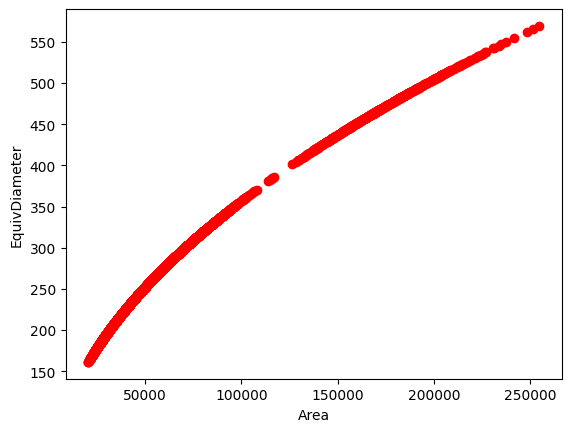

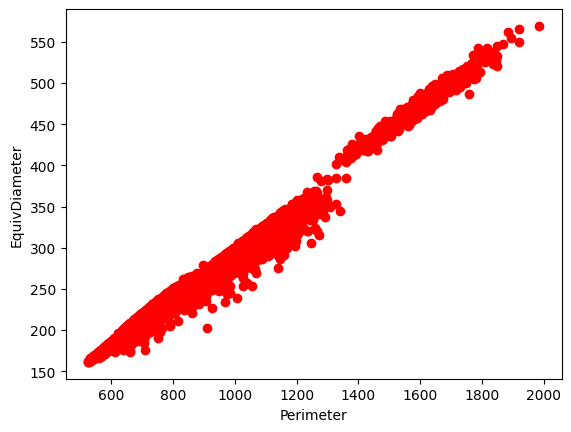

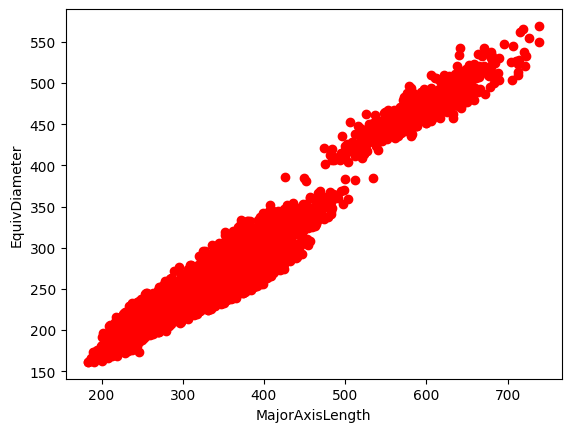

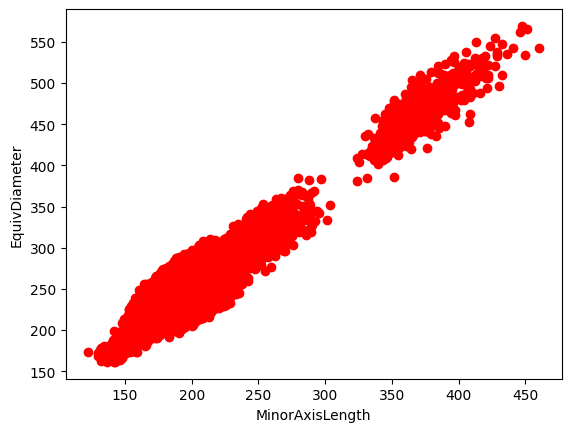

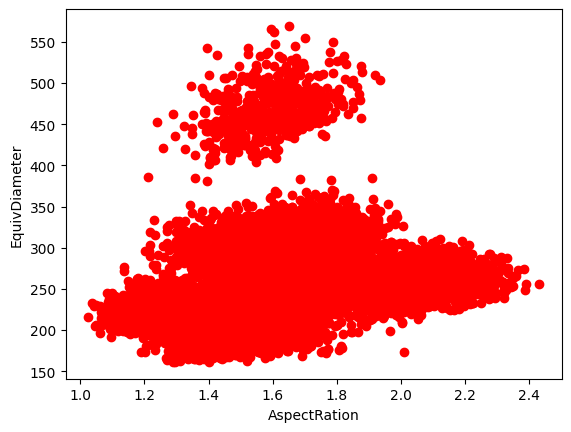

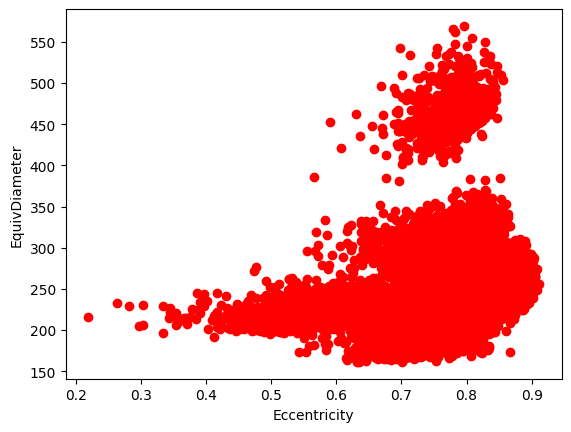

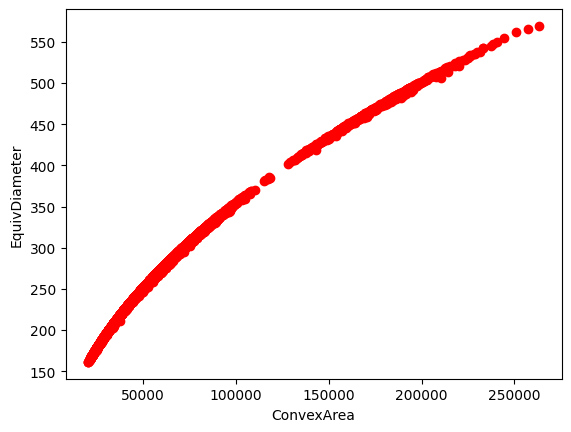

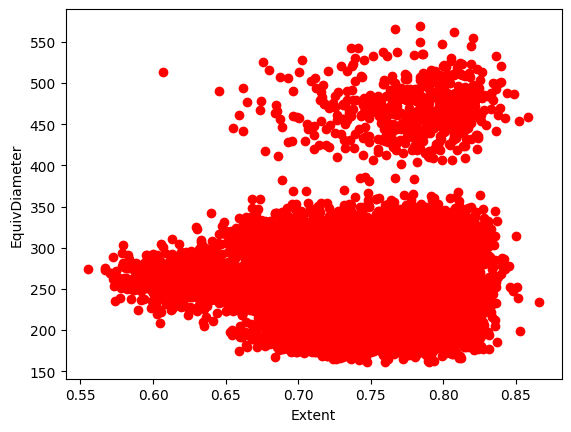

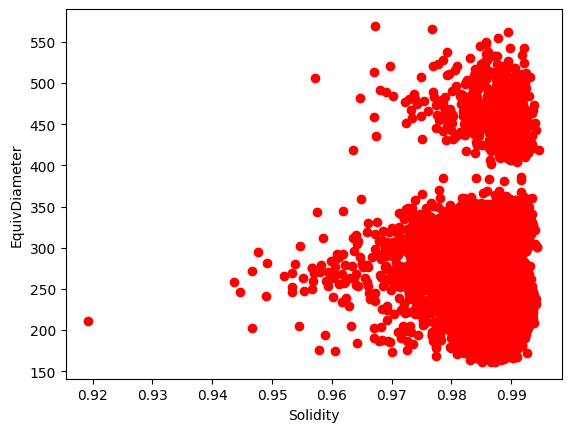

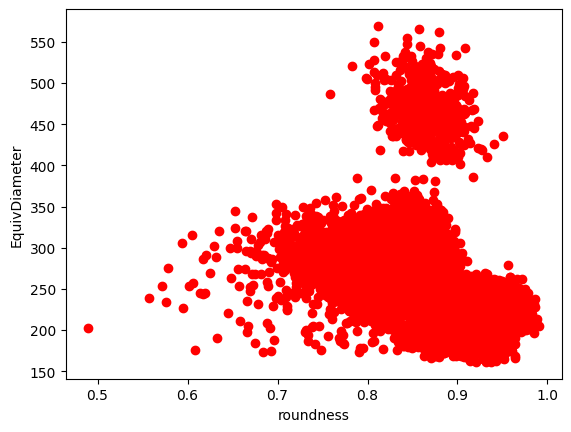

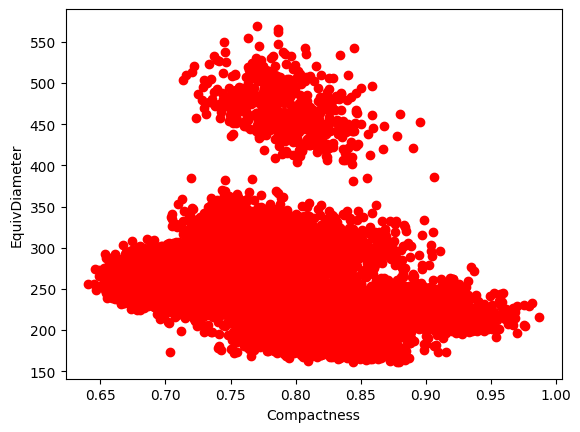

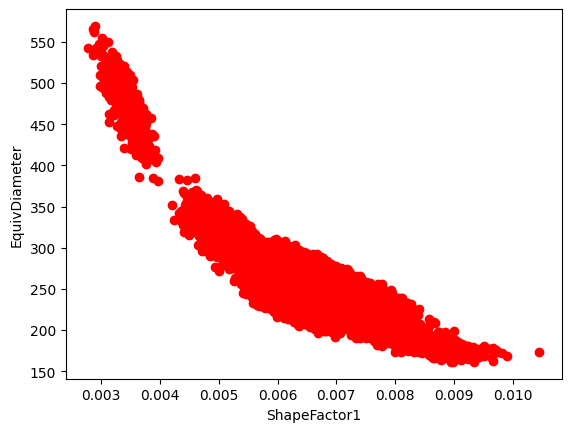

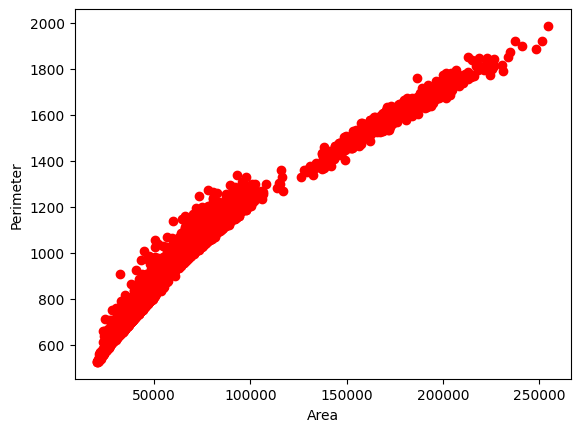

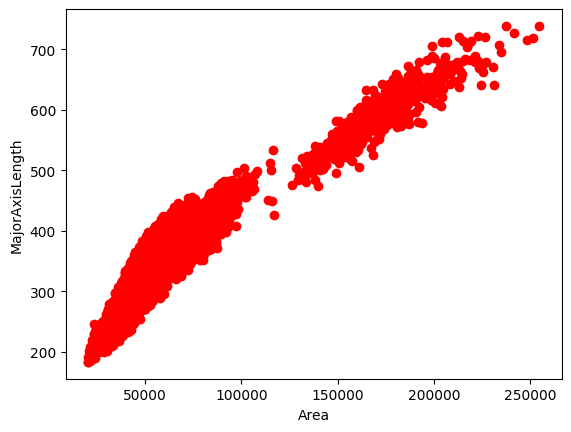

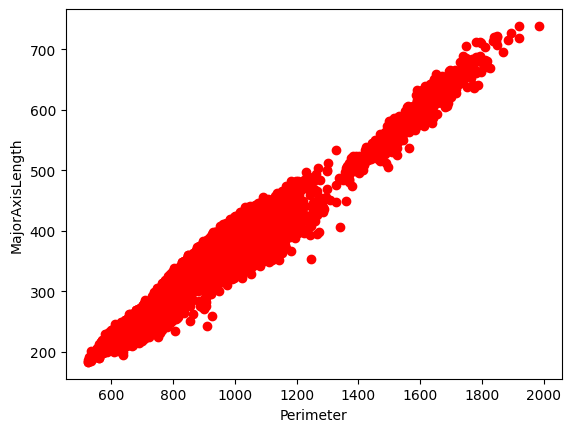

In [9]:
def graficarDatos(x, y, xlabel, ylabel):
    fig = pyplot.figure()
    pyplot.plot(x, y, 'ro')
    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)
    pyplot.show()

# Leer datos
data = np.loadtxt('RijolesSecosDataset.csv', delimiter=',')

# Definir X y y
X = data[:, :-1]  # Todas las columnas excepto la última (EquivDiameter)
y = data[:, -1]   # Última columna (EquivDiameter)

# Graficar datos
xlabel = ["Area", "Perimeter", "MajorAxisLength", "MinorAxisLength", "AspectRation", "Eccentricity", "ConvexArea", "Extent", "Solidity", "roundness", "Compactness", "ShapeFactor1"]
ylabel = "EquivDiameter"

for i in range(X.shape[1]):
    graficarDatos(X[:, i], y, xlabel[i], ylabel)

# Graficar combinación de características
combinaciones = [(0, 1), (0, 2), (1, 2)]
for combo in combinaciones:
    graficarDatos(X[:, combo[0]], X[:, combo[1]], xlabel[combo[0]], xlabel[combo[1]])


In [10]:
# No olvidarse agregar unos a la matriz de x
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [11]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [12]:
theta=np.array([0.5, 0.03, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0])
JJ = calcularCosto(X_ready, y, theta)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

con theta:[0.5  0.03 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.  ] se obtiene un costo de: 33640.75133458218


In [13]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

los valores de theta calculados son: [ 2.48430114e+02  1.04238000e+01  9.66582174e+00  9.43626545e+00
  1.04969841e+01  1.22656694e+00  1.66170989e+00  1.03938630e+01
  2.23399232e-01  7.21898579e-01 -3.70284710e-01 -1.56221178e+00
 -9.63936570e+00]
con un costo de: 11.33646516328148 


Text(0, 0.5, 'Costo J')

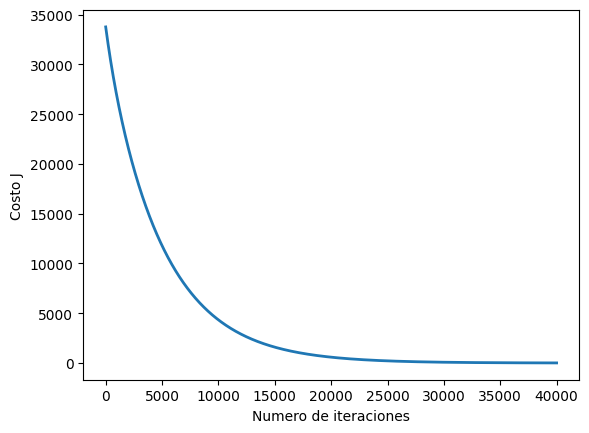

In [14]:
theta = np.zeros(13)

num_ite = 40000
alpha = 0.0001

theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

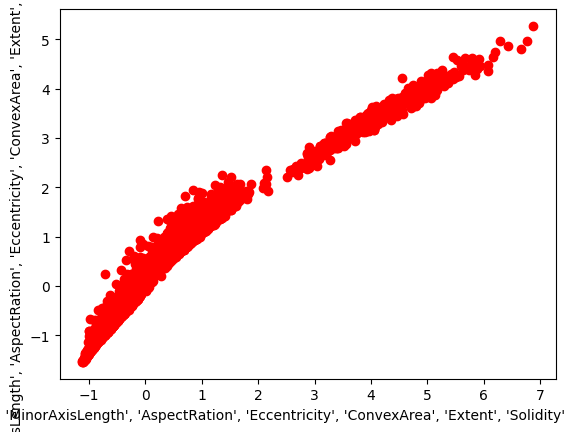

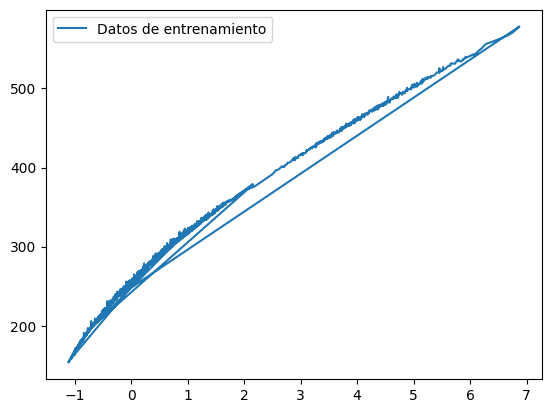

In [15]:

graficarDatos(X_ready[:, 1], X_ready[:, 2], xlabel, xlabel)

pyplot.plot(X_ready[:, 1], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [16]:
y_pred = np.dot([1,28395, 610.291, 208.1781167, 173.888747, 1.197191424, 0.549812187, 28715, 0.763922518, 0.988855999, 0.958027126, 0.913357755, 0.007331506], theta)
print(y_pred)

604382.1158067277


In [17]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [18]:
X_ren = np.concatenate([np.ones((m, 1)), X], axis=1)

In [19]:
theta = calcularThethaEcuacionNormal(X_ren, y);
print(f"los valores de theta calculados son: { theta }")

los valores de theta calculados son: [ 7.14424577e-02  9.23265330e-04  2.95312579e-02  3.11562763e-01
  5.52254059e-01 -1.03371223e+01  1.73530805e+01 -8.26620368e-04
  5.18623274e-02  4.19577139e+01  1.01466277e+01 -3.49446858e+01
 -1.10866966e+03]


In [20]:
X_array = [1, 28395, 610.291, 208.1781167, 173.888747, 1.197191424, 0.549812187, 28715,	0.763922518, 0.988855999, 0.958027126, 0.913357755, 0.007331506
]
price = np.dot(X_array, theta)

print(f"diametro predicho para un frijol de caracteristicas: area 28395, perimetro 610.291 (usando la ecuación de la normal): {price}")

diametro predicho para un frijol de caracteristicas: area 28395, perimetro 610.291 (usando la ecuación de la normal): 189.83583748588185


# 2 Regresión **polinómica**

In [59]:
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

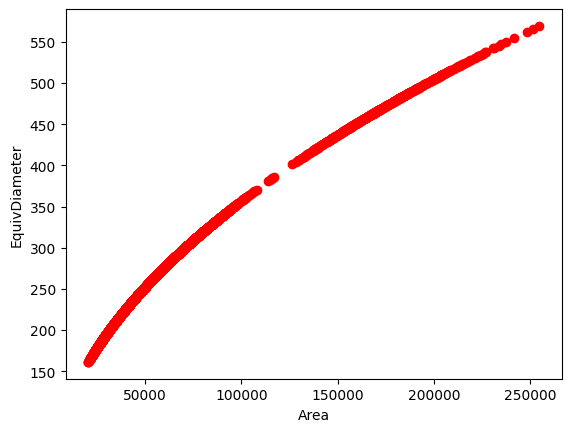

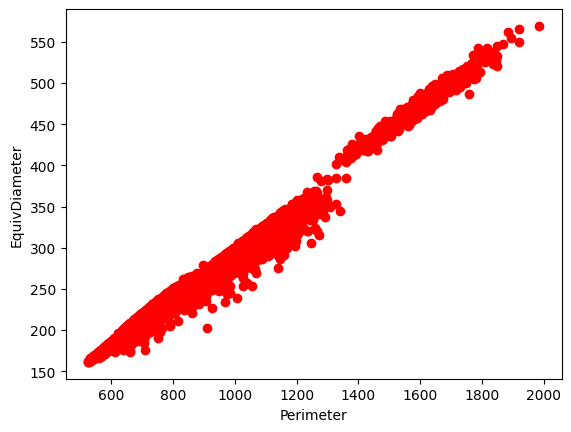

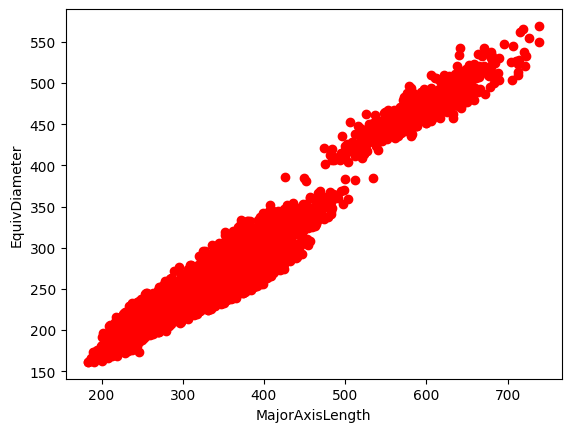

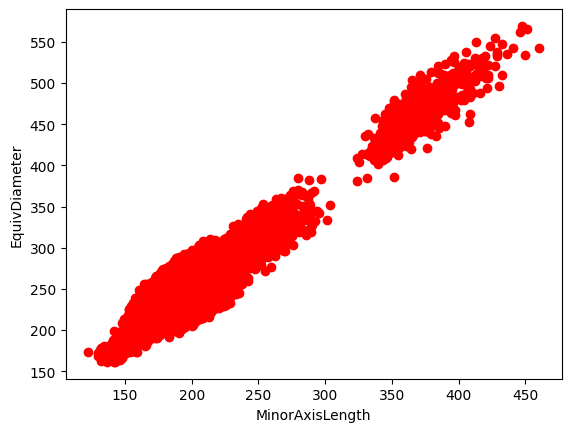

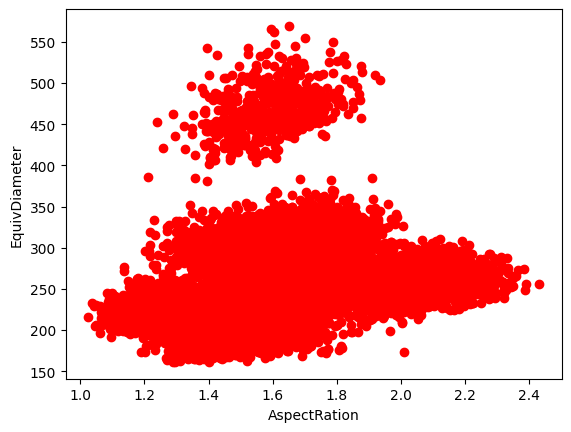

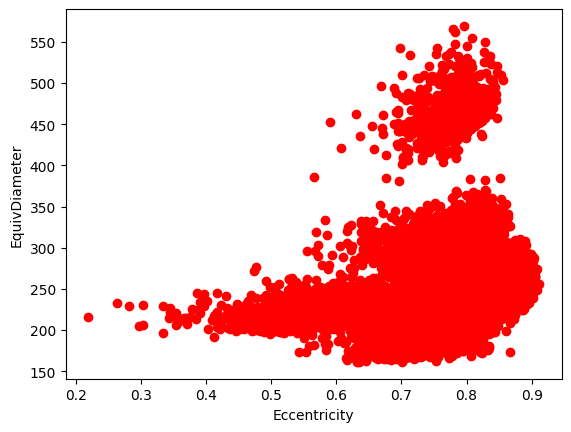

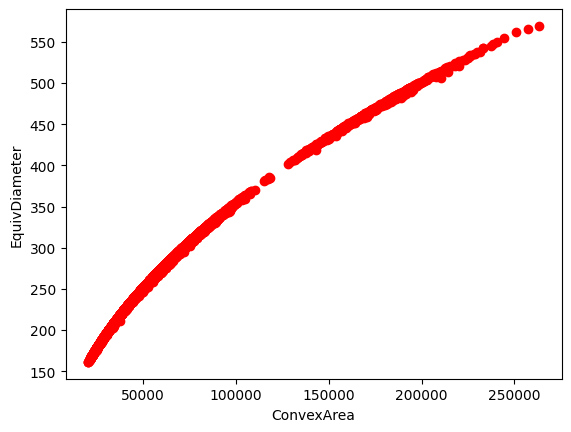

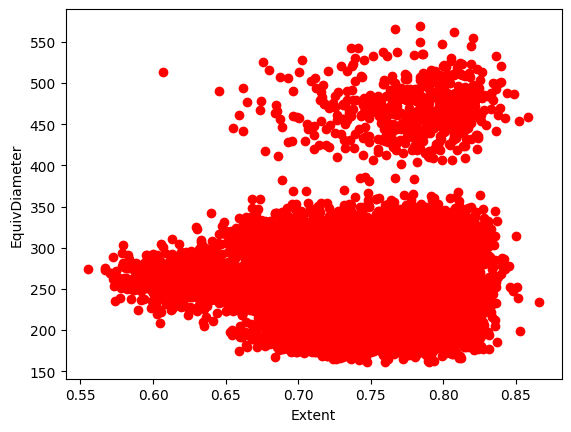

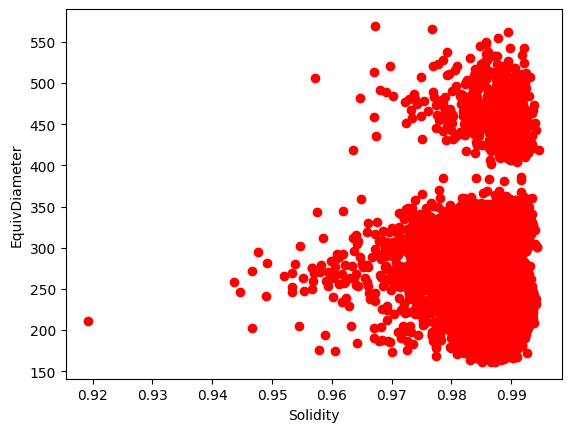

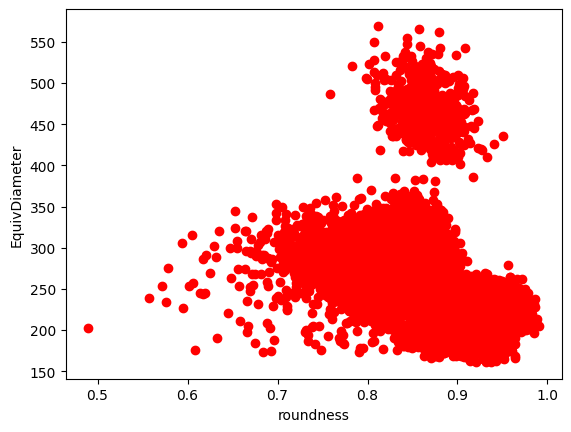

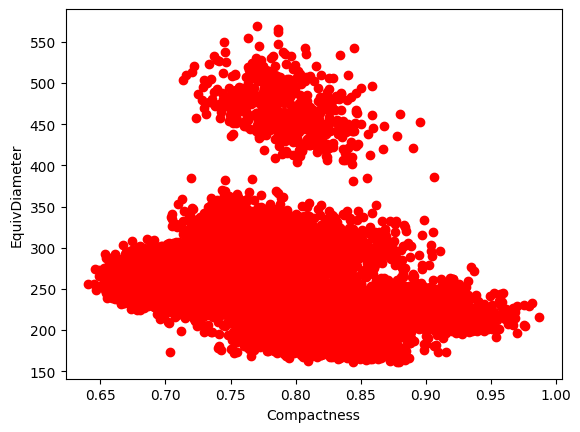

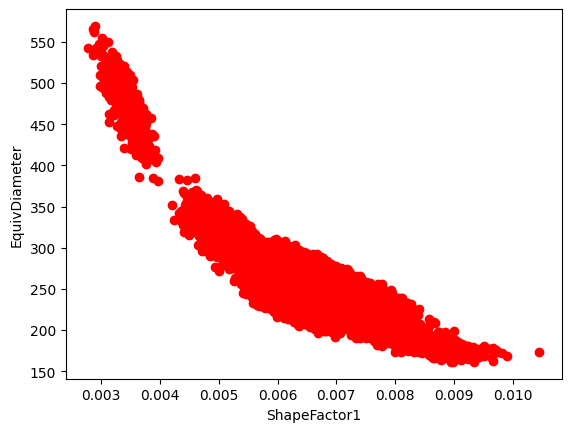

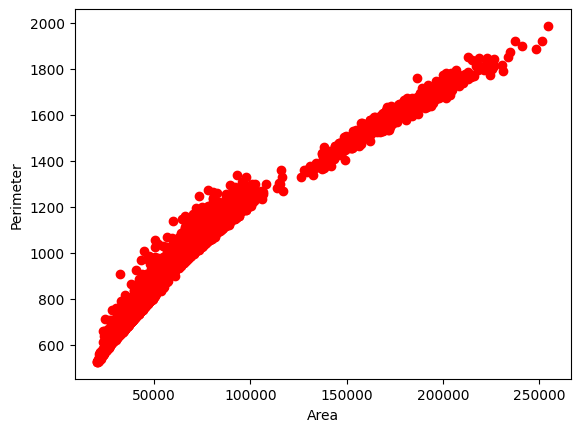

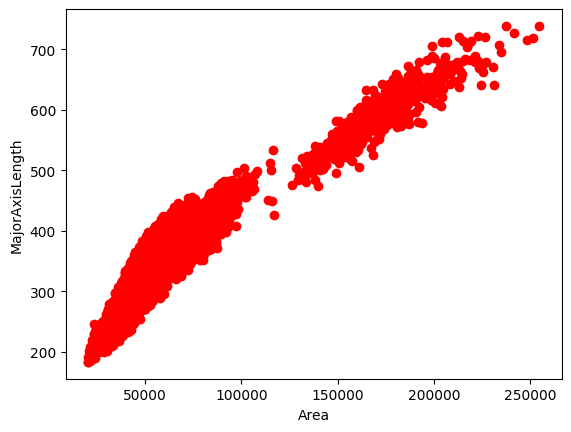

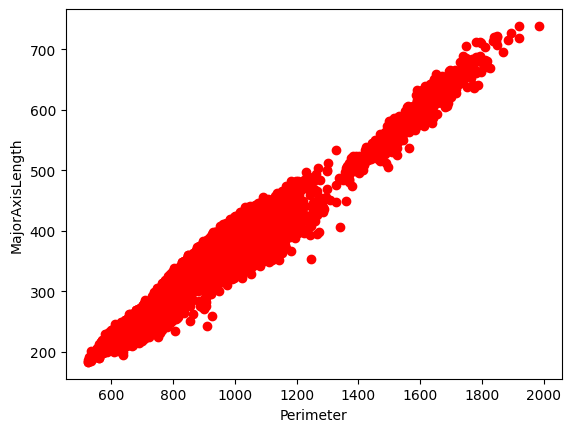

In [60]:

# Leer datos
data = np.loadtxt('RijolesSecosDataset.csv', delimiter=',')

# Definir X y y
X = data[:, :12]  # Todas las columnas excepto la última (EquivDiameter)
y = data[:, 12]   # Última columna (EquivDiameter)

# Graficar datos
xlabel = ["Area", "Perimeter", "MajorAxisLength", "MinorAxisLength", "AspectRation", "Eccentricity", "ConvexArea", "Extent", "Solidity", "roundness", "Compactness", "ShapeFactor1"]
ylabel = "EquivDiameter"

for i in range(X.shape[1]):
    graficarDatos(X[:, i], y, xlabel[i], ylabel)

# Graficar combinación de características
combinaciones = [(0, 1), (0, 2), (1, 2)]
for combo in combinaciones:
    graficarDatos(X[:, combo[0]], X[:, combo[1]], xlabel[combo[0]], xlabel[combo[1]])

In [62]:
def plotData(x, y):
    fig = pyplot.figure()
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.xlabel('Característica de los frijoles')  # Modifica según tus características
    pyplot.ylabel('Diametro de los frijoles')  # Modifica según tus valores objetivo
    pyplot.title('Diagrama de dispersión de datos')  # Añade un título adecuado
    pyplot.show()


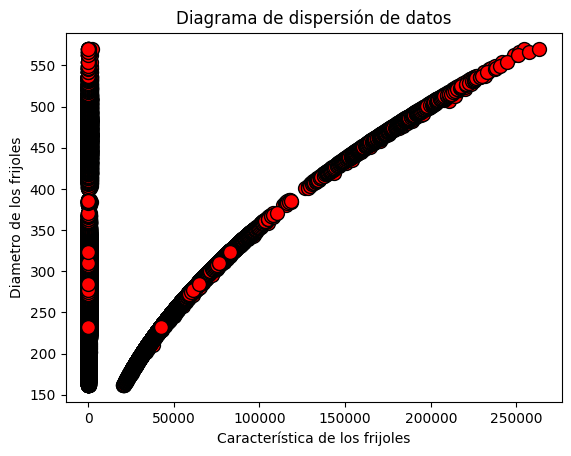

In [63]:
plotData(X,y)

In [64]:
X = np.concatenate([X, X * X], axis=1)

In [65]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    non_zero_sigma = sigma.copy()
    non_zero_sigma[non_zero_sigma == 0] = 1  # Evitar divisiones por cero
    X_norm = (X - mu) / non_zero_sigma
    return X_norm, mu, sigma



In [66]:
X_norm, mu, sigma = featureNormalize(X)


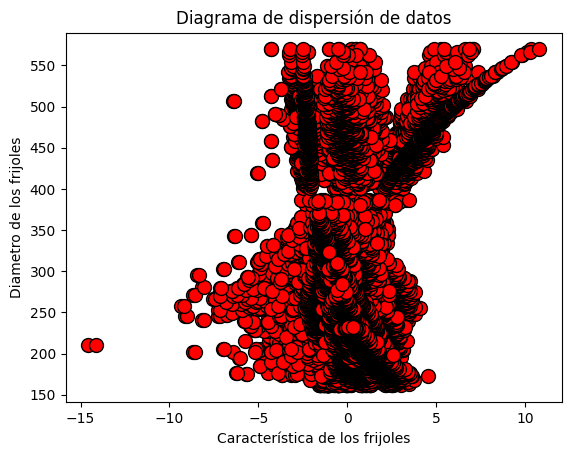

In [67]:
plotData(X_norm, y)

In [55]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [90]:
def computeCost(X, y, theta):
    m = len(y)
    J = np.sum((X.dot(theta) - y) ** 2) / (2 * m)
    return J

In [88]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * X.T.dot(X.dot(theta) - y)
        J_history.append(computeCost(X, y, theta))
    return theta, J_history

In [ ]:
def normalEqn(X, y):
  
    theta = np.zeros(X.shape[1])
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    return theta

In [93]:
# Elegir algunos valores para alpha y num_iters
alpha = 0.001
num_iters = 100000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(13)  # Ten en cuenta que ahora theta tiene 13 elementos
theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Calcular el diámetro para un conjunto de características de frijoles específico
X_array = np.array([1, 28395, 610.291, 208.1781167, 173.888747, 1.197191424, 0.549812187, 28715, 0.763922518, 0.988855999, 0.958027126, 0.913357755, 0.007331506])
X_array = (X_array - mu) / sigma
X_array = np.concatenate([[1], X_array])  # Agregar uno para el término de sesgo
price = np.dot(X_array, theta)

print('Diámetro predicho para un frijol con características específicas (usando el descenso por el gradiente): {:.2f}'.format(price))


ValueError: shapes (13611,24) and (13,) not aligned: 24 (dim 1) != 13 (dim 0)